# Proje Motivasyonu ve Seçim Nedeni
Türkiye'de sektör farketmeksizin herhangi bir meslekte maaş ile alakalı bilgi edinmek oldukça zor.Bu yüzden bu konuda insanların fikir elde edebileceği bir model geliştirmek istedik.

# Projenin amaçları (problem tanımı):
Cevaplamaya çalıştığımız başlıca soru kişinin maaş aralığı.Kişinin kazancına yönelik bilgi sahibi ve bu bilgi doğrultusunda kariyer planlaması yapılabilir.

# Veri:
Verileri 2019 yılında bir twitter hesabı üzerinden yapılan anket ile elde ettik.
https://github.com/oncekiyazilimci/2019-yazilimci-maaslari

# Veri işleme:
Tüm kolonları tarayarak yazım hatası,null değer,yanlış bilgi gibi durumları tespit ederek veriyi model için daha uygun hale getirdik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cities=['Adana', 'Adıyaman', 'Afyon', 'Ağrı', 'Amasya', 'Ankara', 'Antalya', 'Artvin',
'Aydın', 'Balıkesir', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale',
'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir',
'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta', 'Mersin', 'İstanbul', 'İzmir', 
'Kars', 'Kastamonu', 'Kayseri', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 'Malatya', 
'Manisa', 'Kahramanmaraş', 'Mardin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya',
'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Şanlıurfa', 'Uşak',
'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kırıkkale', 'Batman', 'Şırnak',
'Bartın', 'Ardahan', 'Iğdır', 'Yalova', 'Karabük', 'Kilis', 'Osmaniye', 'Düzce']

companies=["Bilişim","Danışmanlık","Dijital / Reklam Ajansı","E-Ticaret","Endüstriyel Otomasyon","Gaming","Freelance",
           "Kurumsal","Kamu","Outsource","Startup","Telekom"]

In [3]:
salary_dataset=pd.read_excel('yazilimci-maaslari-anketi-2019.xlsx')
salary_dataset.tail()

,level,position,skills,experience,company,employees,city,salary
1105,Middle,Full Stack Developer,.Net;Php;JavaScript | Html | Css,0 - 1 Yıl,Startup,10 - 25 Kişi,İstanbul,3.000 TL - 4.000 TL
1106,Middle,Mobile Application Developer,Java;.Net;Php;Python,10 yıldan daha fazla,E-Ticaret,1 - 10 Kişi,yok,15.000 TL veya daha fazla
1107,Senior,Software Architect,.Net;JavaScript | Html | Css,7 - 10 Yıl,Kurumsal,100+ Kişi,İstanbul,10.000 TL - 11.000 TL
1108,Senior,Full Stack Developer,.Net;JavaScript | Html | Css,3 - 5 Yıl,Kurumsal,50 - 100 Kişi,İstanbul,4.000 TL - 5.000 TL
1109,Senior,Back-end Developer,Java,3 - 5 Yıl,E-Ticaret,100+ Kişi,İstanbul,6.000 TL - 7.000 TL


In [4]:
#kolon analizi->kolona göre gruplayarak verisetindeki değerleri gözden geçirdik
#a=salary_dataset.groupby(by="company").size()
#a

In [5]:
def get_clean_columnvalues(x,clean_array):  
    for i in range(len(clean_array)):      
        if x.strip().lower()==clean_array[i].lower():
            return clean_array[i]
    return np.NaN

In [6]:
salary_dataset["city"]=salary_dataset["city"].map(lambda x:get_clean_columnvalues(x,cities))

In [7]:
salary_dataset["company"]=salary_dataset["company"].map(lambda x:get_clean_columnvalues(x,companies))

In [8]:
salary_dataset.dropna(axis=0,how="any",inplace=True)

# Null kontrolü

In [9]:
salary_dataset.isnull().sum()

level         0
position      0
skills        0
experience    0
company       0
employees     0
city          0
salary        0
dtype: int64

In [10]:
salary_dataset.count()

level         1045
position      1045
skills        1045
experience    1045
company       1045
employees     1045
city          1045
salary        1045
dtype: int64

# Keşif Analizi


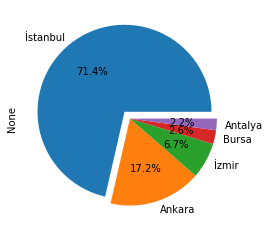

In [11]:
#Developerların çalıştıkları şehirlerin pasta grafiği(İlk 5 şehir)
top_5_city=pd.Series(salary_dataset.groupby(by="city").size().sort_values(ascending=False).head(5))
explode = (0.1,0, 0, 0,0)
top_5_city.plot.pie(explode=explode,labels=top_5_city.index,autopct='%1.1f%%')

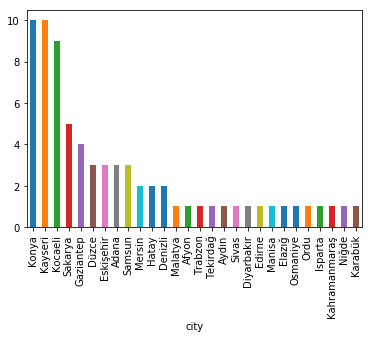

In [12]:
#Developerların çalıştıkları şehirlerin pasta grafiği(Diğer şehirler)
other_city=pd.Series(salary_dataset.groupby(by="city").size().sort_values(ascending=False))
other_city=other_city.drop(top_5_city.index)
other_city[other_city!=0]
other_city.plot.bar()

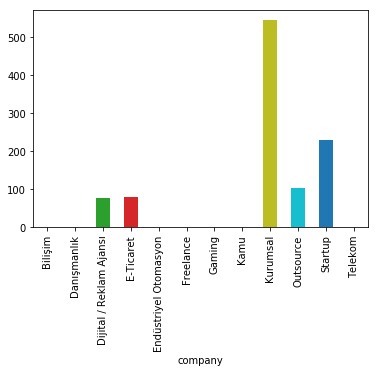

In [13]:
#Developerların kişi bazında şirket dağılımları
company_type=pd.Series(salary_dataset.groupby(by="company").size())
company_type.plot.bar()

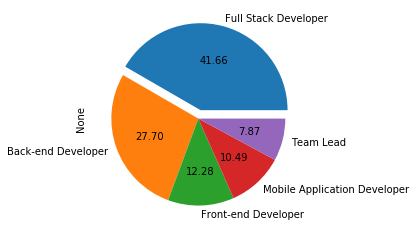

In [14]:
#Developerların çalıştıkları pozisyonlar(Top 5)
top_5_position=pd.Series(salary_dataset.groupby(by="position").size().sort_values(ascending=False)).head(5)
explode = (0.1,0, 0, 0,0)
top_5_position.plot(kind="pie",explode=explode,autopct='%.2f')

In [15]:
position_tech=salary_dataset.groupby(['position','skills']).size().sort_values(ascending=False)
print("Full Stack Developer:",position_tech['Full Stack Developer'].idxmax(),
      "\nBack-end Developer:",position_tech['Back-end Developer'].idxmax(),
      "\nMobile Application Developer",position_tech['Mobile Application Developer'].idxmax(),
      "\nFront-end Developer",position_tech['Front-end Developer'].idxmax(),
      "\nTeam Lead",position_tech['Team Lead'].idxmax())

Full Stack Developer: .Net;JavaScript | Html | Css 
Back-end Developer: .Net 
Mobile Application Developer Swift / Objective C 
Front-end Developer JavaScript | Html | Css 
Team Lead .Net;JavaScript | Html | Css


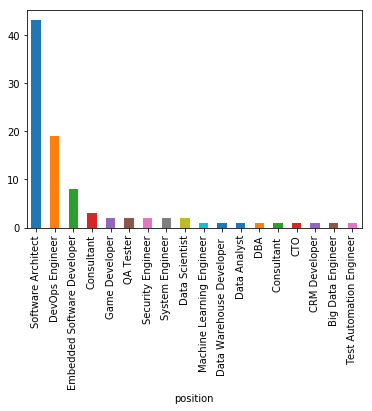

In [16]:
#Developerların çalıştıkları pozisyonların çubuk grafiği(Diğer pozisyonlar)
other_position=pd.Series(salary_dataset.groupby(by="position").size().sort_values(ascending=False))
other_position=other_position.drop(top_5_position.index)
other_position[other_position!=0]
other_position.plot.bar()

In [17]:
salary_degree_list={'2.020 TL - 3.000 TL':0,
                    '3.000 TL - 4.000 TL':1,
                    '4.000 TL - 5.000 TL':2,
                    '5.000 TL - 6.000 TL':3,
                    '6.000 TL - 7.000 TL':4,                    
                    '7.000 TL - 8.000 TL':5,
                    '8.000 TL - 9.000 TL':6,
                    '9.000 TL - 10.000 TL':7,
                    '10.000 TL - 11.000 TL':8,
                    '11.000 TL - 12.000 TL':9,
                    '12.000 TL - 13.000 TL':10,
                    '13.000 TL - 14.000 TL':11,
                    '14.000 TL - 15.000 TL':12,
                    '15.000 TL veya daha fazla':13}    

In [18]:
salary_dataset['salary_degree']=salary_dataset['salary'].map(salary_degree_list)

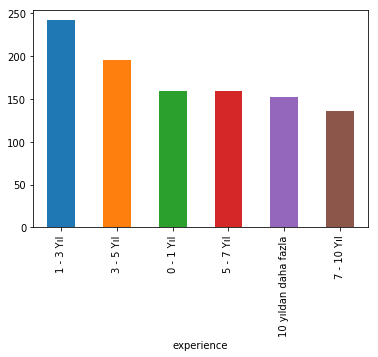

In [19]:
#Developerların tecrübeye göre dağılımı
experience=pd.Series(salary_dataset.groupby(by="experience").size().sort_values(ascending=False))
experience.plot.bar()

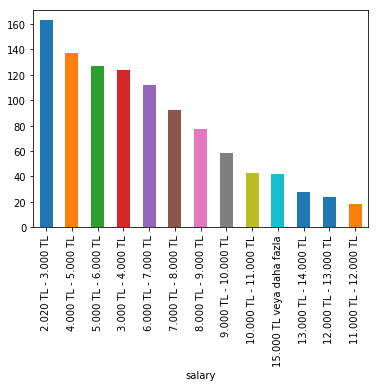

In [20]:
#Developer maaş dağılımı
salary=pd.Series(salary_dataset.groupby(by="salary").size().sort_values(ascending=False))
salary.plot.bar()

In [21]:
#Developerların şehirler bazında aldıkları genel maaş aralıkları
cities_salaries=salary_dataset[['city','salary_degree']]
cities_salaries=cities_salaries.groupby('city').mean()
selected_cities=["İstanbul","Ankara","İzmir"]
cities_salaries=cities_salaries['salary_degree'].sort_values(ascending=False)
salary_scala=cities_salaries[selected_cities].astype(int).values

In [22]:
#İstanbul
city_avg_scala_salary=salary_dataset[(salary_dataset['city'].isin(selected_cities))]
print("İstanbul ortalama maaş aralığı",
      city_avg_scala_salary[city_avg_scala_salary['salary_degree']==salary_scala[0]]['salary'].head(1).values)

İstanbul ortalama maaş aralığı ['6.000 TL - 7.000 TL']


In [23]:
#Ankara
city_avg_scala_salary=salary_dataset[(salary_dataset['city'].isin(selected_cities))]
print("Ankara ortalama maaş aralığı",
      city_avg_scala_salary[city_avg_scala_salary['salary_degree']==salary_scala[1]]['salary'].head(1).values)

Ankara ortalama maaş aralığı ['5.000 TL - 6.000 TL']


In [24]:
#İzmir
city_avg_scala_salary=salary_dataset[(salary_dataset['city'].isin(selected_cities))]
print("İzmir ortalama maaş aralığı",
      city_avg_scala_salary[city_avg_scala_salary['salary_degree']==salary_scala[2]]['salary'].head(1).values)

İzmir ortalama maaş aralığı ['4.000 TL - 5.000 TL']


# Level ve Position kolonlarına göre maaş - kişi analizi

# Junior Full Stack Developer
Junior Full Stack Developer pozisyonunda çalışanların maaş incelemesi

In [25]:
#Level ve position a göre developer dağılımları
developer_position_count=salary_dataset.groupby(['position','level']).size()

In [26]:
print("Junior Full Stack Developer Count:",developer_position_count['Full Stack Developer','Junior'])

Junior Full Stack Developer Count: 98


In [27]:
#Junior Full Stack Developer
junior_full_stack_developer=salary_dataset[(salary_dataset['level']=='Junior') & 
                                           (salary_dataset['position']=='Full Stack Developer')]
junior_full_stack_developer.groupby('salary').size().sort_values(ascending=False)
#junior_full_stack_developer.groupby('salary').size().plot.bar()
#junior_full_stack_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
2.020 TL - 3.000 TL          43
3.000 TL - 4.000 TL          24
5.000 TL - 6.000 TL          12
4.000 TL - 5.000 TL          12
6.000 TL - 7.000 TL           3
15.000 TL veya daha fazla     3
8.000 TL - 9.000 TL           1
dtype: int64

# Middle Full Stack Developer
Middle Full Stack Developer pozisyonunda çalışanların maaş incelemesi

In [28]:
print("Middle Full Stack Developer Count:",developer_position_count['Full Stack Developer','Middle'])

Middle Full Stack Developer Count: 150


In [29]:
#Middle Full Stack Developer
middle_full_stack_developer=salary_dataset[(salary_dataset['level']=='Middle') & 
                                           (salary_dataset['position']=='Full Stack Developer')]
middle_full_stack_developer.groupby('salary').size().sort_values(ascending=False)
#middle_full_stack_developer.groupby('salary').size().plot.bar()
#middle_full_stack_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
4.000 TL - 5.000 TL      36
5.000 TL - 6.000 TL      30
3.000 TL - 4.000 TL      19
6.000 TL - 7.000 TL      18
2.020 TL - 3.000 TL      18
7.000 TL - 8.000 TL      17
8.000 TL - 9.000 TL       9
9.000 TL - 10.000 TL      1
12.000 TL - 13.000 TL     1
10.000 TL - 11.000 TL     1
dtype: int64

# Senior Full Stack Developer
Senior Full Stack Developer pozisyonunda çalışanların maaş incelemesi

In [30]:
print("Senior Full Stack Developer Count:",developer_position_count['Full Stack Developer','Senior'])

Senior Full Stack Developer Count: 149


In [31]:
#Senior Full Stack Developer
senior_full_stack_developer=salary_dataset[(salary_dataset['level']=='Senior') & 
                                           (salary_dataset['position']=='Full Stack Developer')]
senior_full_stack_developer.groupby('salary').size().sort_values(ascending=False)
#senior_full_stack_developer.groupby('salary').size().plot.bar()
#senior_full_stack_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
8.000 TL - 9.000 TL          22
7.000 TL - 8.000 TL          22
6.000 TL - 7.000 TL          20
5.000 TL - 6.000 TL          18
9.000 TL - 10.000 TL         11
10.000 TL - 11.000 TL        11
3.000 TL - 4.000 TL           9
4.000 TL - 5.000 TL           7
15.000 TL veya daha fazla     7
13.000 TL - 14.000 TL         7
12.000 TL - 13.000 TL         7
11.000 TL - 12.000 TL         6
2.020 TL - 3.000 TL           2
dtype: int64

# Junior Back-End Developer
Junior Back-End Developer pozisyonunda çalışanların maaş incelemesi

In [32]:
print("Junior Back-End Developer Count:",developer_position_count['Back-end Developer','Junior'])

Junior Back-End Developer Count: 77


In [33]:
#Junior Back-End Developer
junior_back_end_developer=salary_dataset[(salary_dataset['level']=='Junior') & 
                                           (salary_dataset['position']=='Back-end Developer')]
junior_back_end_developer.groupby('salary').size().sort_values(ascending=False)
#junior_back_end_developer.groupby('salary').size().plot.bar()
#junior_back_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
2.020 TL - 3.000 TL          35
3.000 TL - 4.000 TL          18
4.000 TL - 5.000 TL          15
5.000 TL - 6.000 TL           4
8.000 TL - 9.000 TL           2
6.000 TL - 7.000 TL           2
15.000 TL veya daha fazla     1
dtype: int64

# Middle Back-End Developer
Middle Back-End Developer pozisyonunda çalışanların maaş incelemesi

In [34]:
print("Middle Back-End Developer Count:",developer_position_count['Back-end Developer','Middle'])

Middle Back-End Developer Count: 87


In [35]:
#Middle Back-End Developer
middle_back_end_developer=salary_dataset[(salary_dataset['level']=='Middle') & 
                                           (salary_dataset['position']=='Back-end Developer')]
middle_back_end_developer.groupby('salary').size().sort_values(ascending=False)
#middle_back_end_developer.groupby('salary').size().plot.bar()
#middle_back_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
5.000 TL - 6.000 TL      17
4.000 TL - 5.000 TL      15
7.000 TL - 8.000 TL      14
6.000 TL - 7.000 TL      14
3.000 TL - 4.000 TL      12
2.020 TL - 3.000 TL       6
8.000 TL - 9.000 TL       4
9.000 TL - 10.000 TL      3
10.000 TL - 11.000 TL     2
dtype: int64

# Senior Back-End Developer
Senior Back-End Developer pozisyonunda çalışanların maaş incelemesi

In [36]:
print("Senior Back-End Developer Count:",developer_position_count['Back-end Developer','Senior'])

Senior Back-End Developer Count: 100


In [37]:
#Senior Back-End Developer
senior_back_end_developer=salary_dataset[(salary_dataset['level']=='Senior') & 
                                           (salary_dataset['position']=='Back-end Developer')]
senior_back_end_developer.groupby('salary').size().sort_values(ascending=False)
#senior_back_end_developer.groupby('salary').size().plot.bar()
#senior_back_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
6.000 TL - 7.000 TL          16
9.000 TL - 10.000 TL         15
7.000 TL - 8.000 TL          12
10.000 TL - 11.000 TL        12
8.000 TL - 9.000 TL          11
5.000 TL - 6.000 TL          10
15.000 TL veya daha fazla     5
13.000 TL - 14.000 TL         5
12.000 TL - 13.000 TL         4
11.000 TL - 12.000 TL         4
3.000 TL - 4.000 TL           3
4.000 TL - 5.000 TL           2
2.020 TL - 3.000 TL           1
dtype: int64

# Junior Front-End Developer
Junior Front-End Developer pozisyonunda çalışanların maaş incelemesi

In [38]:
print("Junior Front-End Developer Count:",developer_position_count['Front-end Developer','Junior'])

Junior Front-End Developer Count: 47


In [39]:
#Junior Front-End Developer
junior_front_end_developer=salary_dataset[(salary_dataset['level']=='Junior') & 
                                           (salary_dataset['position']=='Front-end Developer')]
junior_front_end_developer.groupby('salary').size().sort_values(ascending=False)
#junior_front_end_developer.groupby('salary').size().plot.bar()
#junior_front_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
2.020 TL - 3.000 TL          26
3.000 TL - 4.000 TL           8
4.000 TL - 5.000 TL           6
5.000 TL - 6.000 TL           4
8.000 TL - 9.000 TL           1
6.000 TL - 7.000 TL           1
15.000 TL veya daha fazla     1
dtype: int64

# Middle Front-End Developer
Middle Front-End Developer pozisyonunda çalışanların maaş incelemesi

In [40]:
print("Middle Front-End Developer Count:",developer_position_count['Front-end Developer','Middle'])

Middle Front-End Developer Count: 45


In [41]:
#Middle Front-End Developer
middle_front_end_developer=salary_dataset[(salary_dataset['level']=='Middle') & 
                                           (salary_dataset['position']=='Front-end Developer')]
middle_front_end_developer.groupby('salary').size().sort_values(ascending=False)
#middle_front_end_developer.groupby('salary').size().plot.bar()
#middle_front_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
4.000 TL - 5.000 TL    12
6.000 TL - 7.000 TL    11
3.000 TL - 4.000 TL     8
5.000 TL - 6.000 TL     5
2.020 TL - 3.000 TL     5
8.000 TL - 9.000 TL     2
7.000 TL - 8.000 TL     2
dtype: int64

# Senior Front-End Developer
Senior Front-End Developer pozisyonunda çalışanların maaş incelemesi

In [42]:
print("Senior Front-End Developer Count:",developer_position_count['Front-end Developer','Senior'])

Senior Front-End Developer Count: 25


In [43]:
#Senior Front-End Developer
senior_front_end_developer=salary_dataset[(salary_dataset['level']=='Senior') & 
                                           (salary_dataset['position']=='Front-end Developer')]
senior_front_end_developer.groupby('salary').size().sort_values(ascending=False)
#senior_front_end_developer.groupby('salary').size().plot.bar()
#senior_front_end_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
9.000 TL - 10.000 TL         6
6.000 TL - 7.000 TL          6
7.000 TL - 8.000 TL          4
2.020 TL - 3.000 TL          3
5.000 TL - 6.000 TL          2
10.000 TL - 11.000 TL        2
4.000 TL - 5.000 TL          1
15.000 TL veya daha fazla    1
dtype: int64

# Junior Mobile Application Developer
Junior Mobile Application Developer pozisyonunda çalışanların maaş incelemesi

In [44]:
print("Junior Mobile Application Developer Count:",developer_position_count['Mobile Application Developer','Junior'])

Junior Mobile Application Developer Count: 32


In [45]:
#Junior Mobile Application Developer
junior_mobile_application_developer=salary_dataset[(salary_dataset['level']=='Junior') & 
                                           (salary_dataset['position']=='Mobile Application Developer')]
junior_mobile_application_developer.groupby('salary').size().sort_values(ascending=False)
#junior_mobile_application_developer.groupby('salary').size().plot.bar()
#junior_mobile_application_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
2.020 TL - 3.000 TL    13
4.000 TL - 5.000 TL    11
3.000 TL - 4.000 TL     8
dtype: int64

# Middle Mobile Application Developer
Middle Mobile Application Developer pozisyonunda çalışanların maaş incelemesi

In [46]:
print("Middle Mobile Application Developer Count:",developer_position_count['Mobile Application Developer','Middle'])

Middle Mobile Application Developer Count: 45


In [47]:
#Middle Mobile Application Developer
middle_mobile_application_developer=salary_dataset[(salary_dataset['level']=='Middle') & 
                                           (salary_dataset['position']=='Mobile Application Developer')]
middle_mobile_application_developer.groupby('salary').size().sort_values(ascending=False)
#middle_mobile_application_developer.groupby('salary').size().plot.bar()
#middle_mobile_application_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
5.000 TL - 6.000 TL      13
6.000 TL - 7.000 TL       9
7.000 TL - 8.000 TL       5
4.000 TL - 5.000 TL       5
3.000 TL - 4.000 TL       5
2.020 TL - 3.000 TL       3
10.000 TL - 11.000 TL     2
9.000 TL - 10.000 TL      1
8.000 TL - 9.000 TL       1
12.000 TL - 13.000 TL     1
dtype: int64

# Senior Mobile Application Developer
Senior Mobile Application Developer pozisyonunda çalışanların maaş incelemesi

In [48]:
print("Senior Mobile Application Developer Count:",developer_position_count['Mobile Application Developer','Senior'])

Senior Mobile Application Developer Count: 23


In [49]:
#Senior Mobile Application Developer
senior_mobile_application_developer=salary_dataset[(salary_dataset['level']=='Senior') & 
                                           (salary_dataset['position']=='Mobile Application Developer')]
senior_mobile_application_developer.groupby('salary').size().sort_values(ascending=False)
#senior_mobile_application_developer.groupby('salary').size().plot.bar()
#senior_mobile_application_developer.groupby('salary').size().plot.pie(autopct='%.2f')

salary
8.000 TL - 9.000 TL          6
7.000 TL - 8.000 TL          3
4.000 TL - 5.000 TL          3
6.000 TL - 7.000 TL          2
13.000 TL - 14.000 TL        2
10.000 TL - 11.000 TL        2
9.000 TL - 10.000 TL         1
5.000 TL - 6.000 TL          1
2.020 TL - 3.000 TL          1
15.000 TL veya daha fazla    1
12.000 TL - 13.000 TL        1
dtype: int64

# Team Lead
Team Lead pozisyonunda çalışanların maaş incelemesi

In [50]:
print("Team Lead Count:",developer_position_count['Team Lead'].sum())

Team Lead Count: 75


In [51]:
#Team Lead
team_lead=salary_dataset[salary_dataset['position']=='Team Lead']
team_lead.groupby('salary').size().sort_values(ascending=False)
#team_lead.groupby('salary').size().plot.bar()
#team_lead.groupby('salary').size().plot.pie(autopct='%.2f')

salary
8.000 TL - 9.000 TL          12
9.000 TL - 10.000 TL         11
7.000 TL - 8.000 TL           9
15.000 TL veya daha fazla     8
13.000 TL - 14.000 TL         7
12.000 TL - 13.000 TL         6
11.000 TL - 12.000 TL         6
10.000 TL - 11.000 TL         6
6.000 TL - 7.000 TL           5
4.000 TL - 5.000 TL           2
3.000 TL - 4.000 TL           2
5.000 TL - 6.000 TL           1
dtype: int64

# Software Architect
Software Architect pozisyonunda çalışanların maaş incelemesi

In [52]:
print("Software Architect Count:",developer_position_count['Software Architect'].sum())

Software Architect Count: 43


In [53]:
#Software Architect
software_architect=salary_dataset[salary_dataset['position']=='Software Architect']
software_architect.groupby('salary').size().sort_values(ascending=False)
#software_architect.groupby('salary').size().plot.bar()
#software_architect.groupby('salary').size().plot.pie(autopct='%.2f')

salary
15.000 TL veya daha fazla    10
13.000 TL - 14.000 TL         6
9.000 TL - 10.000 TL          3
7.000 TL - 8.000 TL           3
4.000 TL - 5.000 TL           3
3.000 TL - 4.000 TL           3
2.020 TL - 3.000 TL           3
12.000 TL - 13.000 TL         3
10.000 TL - 11.000 TL         3
8.000 TL - 9.000 TL           2
5.000 TL - 6.000 TL           2
6.000 TL - 7.000 TL           1
11.000 TL - 12.000 TL         1
dtype: int64

# DEVOPS Engineer
DEVOPS Engineer pozisyonunda çalışanların maaş incelemesi

In [54]:
print("DEVOPS Engineer Count:",developer_position_count['DevOps Engineer'].sum())

DEVOPS Engineer Count: 19


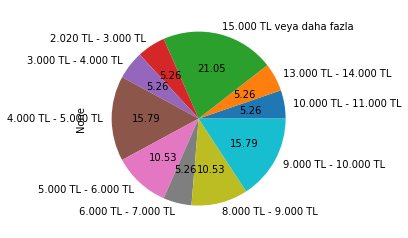

In [55]:
#DEVOPS Engineer
devops_engineer=salary_dataset[salary_dataset['position']=='DevOps Engineer']
devops_engineer.groupby('salary').size().sort_values(ascending=False)
#devops_engineer.groupby('salary').size().plot.bar()
devops_engineer.groupby('salary').size().plot.pie(autopct='%.2f')

# Analiz metodolojisi:


# ENCODING

In [56]:
del salary_dataset["salary_degree"]

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [58]:
tech = ['C / C++','.Net','Sql','Java','Swift / Objective C','Cf','JavaScript | Html | Css','Flutter','Xml','perl','React-native',
       'Golang','Delphi','abap','Scala','Assembly','React','Sql server','Php','PL/SQL','oracle','Go','Kotlin','Cobol','Coldfusion',
       'Laravel','sql','.Net Core, C#','Ruby','X++','Node.js','Python','Angular','C#','Typescript','Vb.net','Elixir']



In [59]:
salary_dataset.head()

,level,position,skills,experience,company,employees,city,salary
0,Junior,Back-end Developer,Java,1 - 3 Yıl,Startup,1 - 10 Kişi,İstanbul,2.020 TL - 3.000 TL
1,Senior,DevOps Engineer,Java;Go,3 - 5 Yıl,Startup,100+ Kişi,Ankara,15.000 TL veya daha fazla
2,Middle,Full Stack Developer,.Net,3 - 5 Yıl,Outsource,100+ Kişi,İstanbul,7.000 TL - 8.000 TL
3,Senior,Team Lead,.Net,10 yıldan daha fazla,Kurumsal,100+ Kişi,İstanbul,13.000 TL - 14.000 TL
4,Junior,Back-end Developer,.Net;JavaScript | Html | Css,0 - 1 Yıl,Outsource,1 - 10 Kişi,İstanbul,3.000 TL - 4.000 TL


In [60]:
lower_tech = [x.lower() for x in tech]
salary_dataset = salary_dataset.applymap(str.lower)

In [61]:
def encodeTechByOneHot(x,skill_item):
        if x.find(skill_item) == -1:
            return 0
        else:
            return 1

In [62]:
salary_list={'2.020 tl - 3.000 tl' : 0,
                    '3.000 tl - 4.000 tl': 0,
                    '4.000 tl - 5.000 tl': 0,
                    '5.000 tl - 6.000 tl': 0,
                    '6.000 tl - 7.000 tl': 0,                    
                    '7.000 tl - 8.000 tl': 1,
                    '8.000 tl - 9.000 tl': 1,
                    '9.000 tl - 10.000 tl': 1,
                    '10.000 tl - 11.000 tl': 1,
                    '11.000 tl - 12.000 tl': 1,
                    '12.000 tl - 13.000 tl': 2,
                    '13.000 tl - 14.000 tl': 2,
                    '14.000 tl - 15.000 tl': 2,
                    '15.000 tl veya daha fazla': 2
            }   

In [63]:

le = LabelEncoder()
salary_dataset["level"] = le.fit_transform(salary_dataset["level"])
salary_dataset["experience"] = le.fit_transform(salary_dataset["experience"])
salary_dataset["salary"] = salary_dataset["salary"].map(salary_list)

salary_dataset["company"] = le.fit_transform(salary_dataset["company"])
salary_dataset["position"] = le.fit_transform(salary_dataset["position"])
salary_dataset["city"] = le.fit_transform(salary_dataset["city"])
salary_dataset["employees"] = le.fit_transform(salary_dataset["employees"])

for skill_item in lower_tech:
    salary_dataset[skill_item] = salary_dataset["skills"].apply(lambda x:encodeTechByOneHot(x,skill_item))
    


In [64]:
del salary_dataset["skills"]

In [65]:
salary_dataset.head()

,level,position,experience,company,employees,city,salary,c / c++,.net,sql,...,".net core, c#",ruby,x++,node.js,python,angular,c#,typescript,vb.net,elixir
0,0,0,1,10,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10,3,10,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13,3,9,2,15,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,21,2,8,2,15,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,9,0,15,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
salary_dataset.columns


Index(['level', 'position', 'experience', 'company', 'employees', 'city',
       'salary', 'c / c++', '.net', 'sql', 'java', 'swift / objective c', 'cf',
       'javascript | html | css', 'flutter', 'xml', 'perl', 'react-native',
       'golang', 'delphi', 'abap', 'scala', 'assembly', 'react', 'sql server',
       'php', 'pl/sql', 'oracle', 'go', 'kotlin', 'cobol', 'coldfusion',
       'laravel', '.net core, c#', 'ruby', 'x++', 'node.js', 'python',
       'angular', 'c#', 'typescript', 'vb.net', 'elixir'],
      dtype='object')

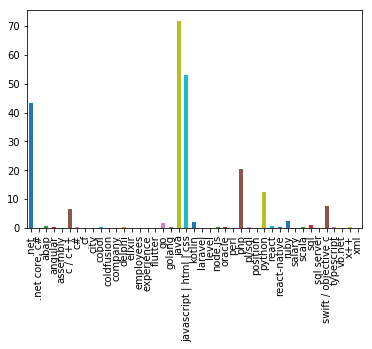

In [67]:
#Developerların bildiği teknolojiler
(salary_dataset.loc[:,'c / c++':'elixir'].sum()*100/salary_dataset.count()).plot.bar()

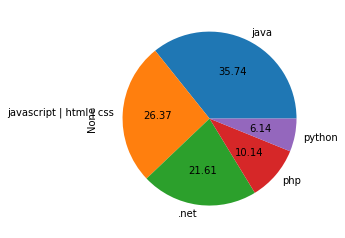

In [68]:
#Developarların bildiği teknolojiler(TOP 5)
salary_dataset.loc[:,'c / c++':'elixir'].sum().sort_values(ascending=False).head(5).plot.pie(autopct='%.2f')

In [69]:
salary_dataset.columns.size

43

# MODEL OLUŞTURMA

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [71]:
y = salary_dataset["salary"]
X = salary_dataset
del X["salary"]

In [72]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy')

In [73]:
rf_model = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)

# K FOLD

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score

k_fold  = KFold(n_splits=10)


In [75]:
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [76]:
X = X.values
y = y.values

# Decision Tree

In [77]:
for k, (train, test) in enumerate(k_fold.split(X, y)):
    tree_model.fit(X[train], y[train])
    
    print("[fold {0}], score: {2:.5f}".format(k,_, tree_model.score(X[test], y[test])))

[fold 0], score: 0.62857
[fold 1], score: 0.77143
[fold 2], score: 0.64762
[fold 3], score: 0.61905
[fold 4], score: 0.70476
[fold 5], score: 0.67308
[fold 6], score: 0.71154
[fold 7], score: 0.68269
[fold 8], score: 0.79808
[fold 9], score: 0.70192


# Random Forest

# Analiz sonuçları:


In [78]:
k_fold_iteration = [1,2,3,4,5,6,7,8,9,10]
acc_scores = []
prec_scores = []
predict = ""
y_test = ""

In [79]:
for k, (train, test) in enumerate(k_fold.split(X, y)):
    rf_model.fit(X[train], y[train])
    result = rf_model.predict(X[test])
    
    acc_score = accuracy_score(y[test],result)
    #prec_score = precision_score(y[test],result,average='weighted', labels=np.unique(result))
    
    #print("[fold {0}], acc_score: {2:.5f}, prec_score: {2:.5f}".format(k,_, acc_score,prec_score))
    acc_scores.append(acc_score)
    print(classification_report(y[test], result))
    prec_scores.append(precision_score(y[test], result,average='weighted'))
    predict = result
    y_test = y[test]

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        57
           1       0.55      0.61      0.58        36
           2       0.33      0.08      0.13        12

   micro avg       0.68      0.68      0.68       105
   macro avg       0.55      0.51      0.51       105
weighted avg       0.65      0.68      0.65       105

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        75
           1       0.62      0.75      0.68        24
           2       0.67      0.33      0.44         6

   micro avg       0.82      0.82      0.82       105
   macro avg       0.73      0.65      0.67       105
weighted avg       0.83      0.82      0.82       105

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        60
           1       0.59      0.59      0.59        34
           2       0.50      0.27      0.35        11

   micro avg       0

Text(0, 0.5, 'Cross-validated accuracy')

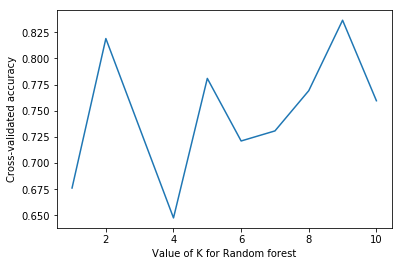

In [80]:
plt.plot(k_fold_iteration, acc_scores)
plt.xlabel('Value of K for Random forest')
plt.ylabel('Cross-validated accuracy')

Text(0, 0.5, 'Cross-validated precision')

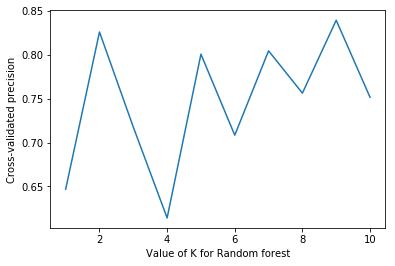

In [81]:
plt.plot(k_fold_iteration, prec_scores)
plt.xlabel('Value of K for Random forest')
plt.ylabel('Cross-validated precision')

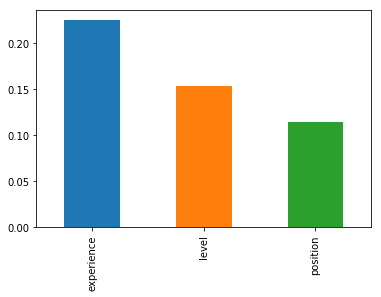

In [82]:
#En önemli 3 feature
importance = rf_model.feature_importances_
col = salary_dataset.columns
importance_frame = pd.DataFrame(data=importance.reshape(1,42),columns=col)
importance_frame.sort_values(axis=1,by=0,ascending=False).iloc[0,0:3].plot.bar()



In [83]:
cm = confusion_matrix(y_test,predict)
cm

array([[55,  8,  0],
       [ 9, 21,  3],
       [ 2,  3,  3]], dtype=int64)

In [84]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.87301587 0.12698413 0.        ]
 [0.27272727 0.63636364 0.09090909]
 [0.25       0.375      0.375     ]]


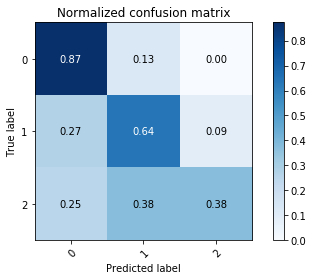

In [85]:
plot_confusion_matrix(y_test, predict, normalize=True,
                      title='Normalized confusion matrix')

# İş Bölümü:
Farklı bölüm ve sorumlulukların hangi grup üyeleri tarafından yapıldığını belirtiniz.

In [86]:
result2 = rf_model.predict(X)

In [87]:
rf_model.score(X,y)

0.9425837320574163

Normalized confusion matrix
[[0.87301587 0.12698413 0.        ]
 [0.27272727 0.63636364 0.09090909]
 [0.25       0.375      0.375     ]]


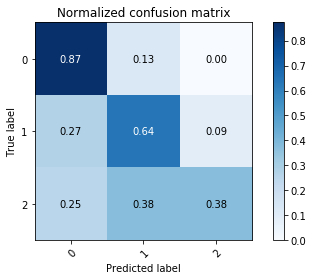

In [88]:
plot_confusion_matrix(y_test, predict, normalize=True,
                      title='Normalized confusion matrix')